In [10]:
#%cd C:\Users\user\Drive\TNT\2021-2_TNT_Industrial_AI\TASK2\week3\voc2coco-master
#!python voc2coco.py --ann_dir C:/Users/user/Drive/TNT/2021-2_TNT_Industrial_AI/TASK2/week3/xml --ann_ids C:/Users/user/Drive/TNT/2021-2_TNT_Industrial_AI/TASK2/week3/text_and_json_result/name.txt --labels C:/Users/user/Drive/TNT/2021-2_TNT_Industrial_AI/TASK2/week3/text_and_json_result/label.txt --output C:/Users/user/Drive/TNT/2021-2_TNT_Industrial_AI/TASK2/week3/text_and_json_result/output.json

C:\Users\user\Drive\TNT\2021-2_TNT_Industrial_AI\TASK2\week3\voc2coco-master
Start converting !



100%|██████████| 540/540 [00:00<00:00, 13494.30it/s]


In [36]:
import os
from os.path import join
import numpy as np
import pandas as pd
import cv2
import gc
import torch 
import torchvision
import matplotlib.pyplot as plt

USE_CUDA = torch.cuda.is_available() 
device = torch.device('cuda:0' if USE_CUDA else 'cpu')

print('pytorch version :',torch.__version__)
print('Training device :',device)
print('cuda index :', torch.cuda.current_device())
print('graphic name :', torch.cuda.get_device_name())

pytorch version : 1.9.1
Training device : cuda:0
cuda index : 0
graphic name : NVIDIA GeForce RTX 3080 Ti


In [5]:
!git clone https://github.com/facebookresearch/detectron2.git
!python -m pip install -e detectron2

Cloning into 'detectron2'...


Obtaining file:///C:/Users/user/Drive/TNT/2021-2_TNT_Industrial_AI/TASK2/week3/detectron2
  Running setup.py develop for detectron2


In [24]:
# 기본 설정
# detectron2 logger 설정
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# 자주 사용하는 라이브러리 임폴트
import numpy as np
import cv2
import random

# 자주 사용하는 detectron2 유틸 임폴트 
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog


# 이미지/바운딩 라벨 설정

In [25]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances('data', {}, r'C:\Users\user\Drive\TNT\2021-2_TNT_Industrial_AI\TASK2\week3\text_and_json_result\output.json',
                                    r'C:\Users\user\Drive\TNT\2021-2_TNT_Industrial_AI\TASK2\week3\jpgimg')





In [30]:
from detectron2.structures import BoxMode
import itertools
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(r"C:\Users\user\Drive\TNT\2021-2_TNT_Industrial_AI\TASK2\week3\detectron2\configs\COCO-Detection\retinanet_R_101_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("data")
cfg.DATASETS.TEST = ("")
cfg.DATALOADER.NUM_WORKERS = 1
cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/retinanet_R_101_FPN_3x/190397697/model_final_971ab9.pkl" # pretrained from COCO dataset
cfg.SOLVER.IMS_PER_BATCH = 10
cfg.SOLVER.BASE_LR = 0.001
cfg.SOLVER.MAX_ITER = 50000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1 

Loading config C:\Users\user\Drive\TNT\2021-2_TNT_Industrial_AI\TASK2\week3\detectron2\configs\COCO-Detection\../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [31]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[10/04 19:46:49 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

model_final_971ab9.pkl: 228MB [00:29, 7.71MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


[10/04 19:47:19 d2.engine.train_loop]: Starting training from iteration 0


C:\Users\user\anaconda3\envs\torch\lib\site-packages\torch\_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ..\aten\src\ATen\native\BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


[10/04 19:47:32 d2.utils.events]:  eta: 1:34:17  iter: 19  total_loss: 1.617  loss_cls: 1.192  loss_box_reg: 0.3806  time: 0.5811  data_time: 0.0598  lr: 1.9981e-05  max_mem: 4963M
[10/04 19:47:38 d2.utils.events]:  eta: 1:31:34  iter: 39  total_loss: 1.29  loss_cls: 0.9799  loss_box_reg: 0.2926  time: 0.4428  data_time: 0.0766  lr: 3.9961e-05  max_mem: 4963M
[10/04 19:47:44 d2.utils.events]:  eta: 0:53:05  iter: 59  total_loss: 0.6101  loss_cls: 0.4575  loss_box_reg: 0.2049  time: 0.3959  data_time: 0.1043  lr: 5.9941e-05  max_mem: 4963M
[10/04 19:47:50 d2.utils.events]:  eta: 0:51:30  iter: 79  total_loss: 0.7105  loss_cls: 0.4383  loss_box_reg: 0.2498  time: 0.3705  data_time: 0.0979  lr: 7.9921e-05  max_mem: 4963M
[10/04 19:47:56 d2.utils.events]:  eta: 0:50:53  iter: 99  total_loss: 0.6262  loss_cls: 0.4076  loss_box_reg: 0.207  time: 0.3561  data_time: 0.0948  lr: 9.9901e-05  max_mem: 4963M
[10/04 19:48:02 d2.utils.events]:  eta: 0:50:32  iter: 119  total_loss: 0.5368  loss_cls: 

In [63]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set the testing threshold for this model
cfg.DATASETS.TEST = ("data")
predictor = DefaultPredictor(cfg)


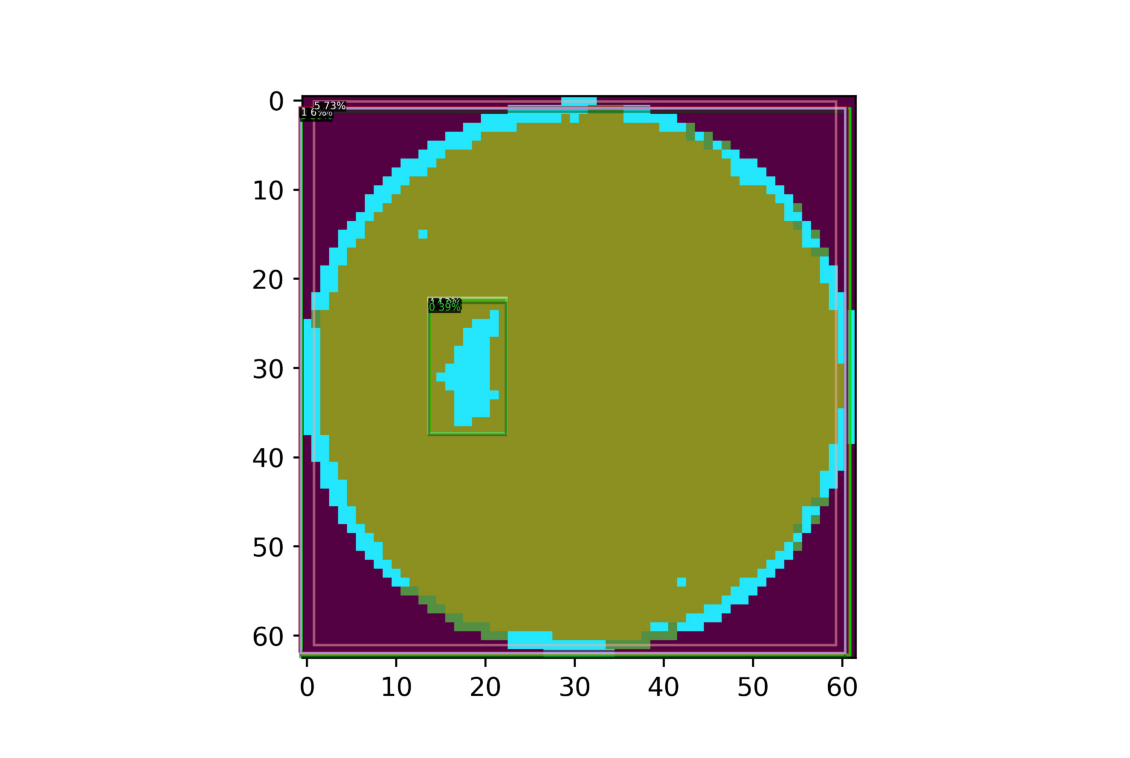

In [68]:
from detectron2.utils.visualizer import ColorMode
plt.figure(figsize=(20, 20))
im = plt.imread(r'C:\Users\user\Drive\TNT\2021-2_TNT_Industrial_AI\TASK2\week3\testimg\edge_ring221.jpg')
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], scale=1.5)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v.get_image()[:, :, ::-1])
plt.axis('off')
plt.show()

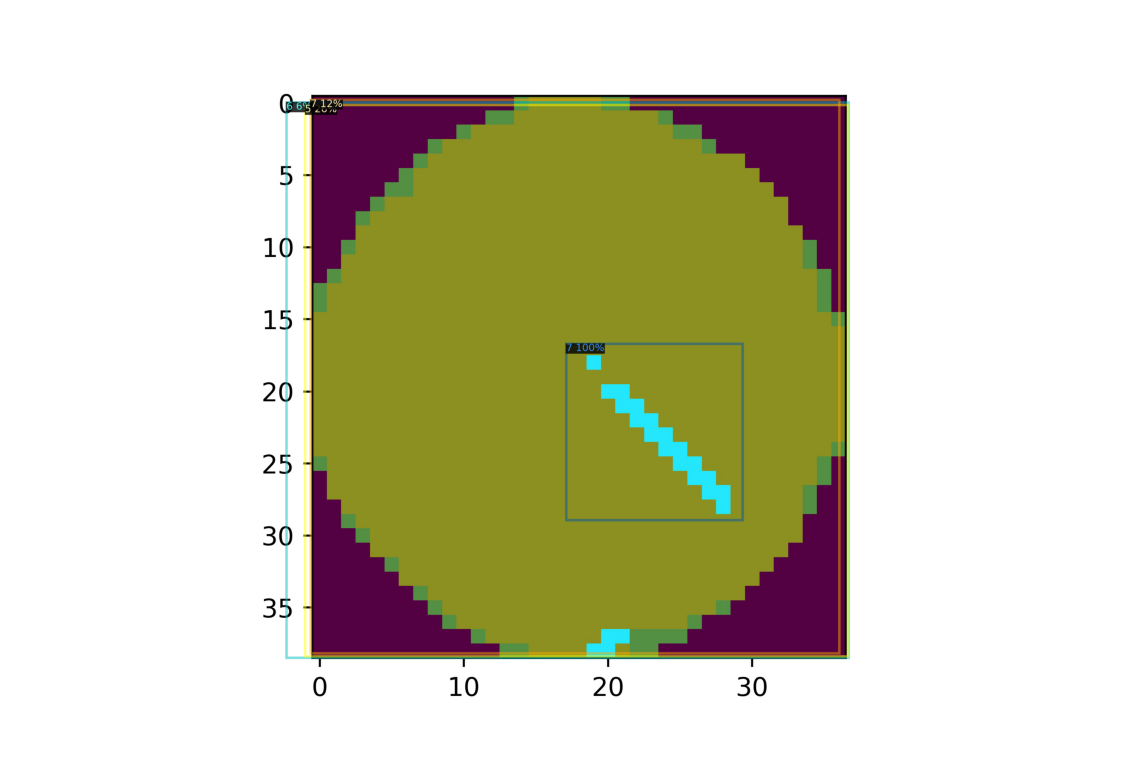

In [70]:
plt.figure(figsize=(20, 20))
im = plt.imread(r'C:\Users\user\Drive\TNT\2021-2_TNT_Industrial_AI\TASK2\week3\testimg\scratch168.jpg')
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1])
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(v.get_image()[:, :, ::-1])
plt.axis('off')
plt.show()